In [1]:
# Importing libraries and dependancies
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime
from pathlib import Path
%matplotlib inline

# Importing and reading all Data
algo_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_csvpath, parse_dates=True, infer_datetime_format=True)
whale_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/whale_returns.csv')                                                    
whale_returns = pd.read_csv(whale_csvpath, parse_dates=True, infer_datetime_format=True)
sp_tsx_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/sp_tsx_history.csv')                                                    
sp_tsx_history = pd.read_csv(sp_tsx_csvpath, parse_dates=True, infer_datetime_format=True)
tesla_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/Daily Price TESLA .csv')
tesla_returns = pd.read_csv(tesla_csvpath, parse_dates=True, infer_datetime_format=True)
abb_ltd_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/Daily Price ABB Ltd .csv')
abb_returns = pd.read_csv(abb_ltd_csvpath, parse_dates=True, infer_datetime_format=True)
amazon_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/Daily Price AMAZON .csv')
amazon_returns = pd.read_csv(amazon_csvpath, parse_dates=True, infer_datetime_format=True)
bhp_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/Daily Price BHP .csv')
bhp_returns = pd.read_csv(bhp_csvpath, parse_dates=True, infer_datetime_format=True)
anz_csvpath = Path('../Portfolio_Analysis-Mod_4/Resources/Daily Price ANZ .csv')
anz_returns = pd.read_csv(anz_csvpath, parse_dates=True, infer_datetime_format=True)


In [2]:
whale_returns.isnull().sum() # Sample - counting nulls in Whale portfolio

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [3]:
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [4]:
sp_tsx_history.isnull().sum()

Date     0
Close    0
dtype: int64

In [5]:
#Cleaning Supplied Data 

whale_returns.fillna(0)
whale_returns.duplicated
algo_returns.dropna(inplace=True)
whale_returns.dropna(inplace=True)
sp_tsx_history.dropna(inplace=True)
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',',"" ,regex = True).str.replace('$',"" ,regex = True)
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype(float)
#setting Index and dropping redundant columns
algo_returns=algo_returns.set_index(pd.to_datetime(algo_returns["Date"], infer_datetime_format=True))
whale_returns=whale_returns.set_index(pd.to_datetime(whale_returns["Date"], infer_datetime_format=True))
sp_tsx_history = sp_tsx_history.set_index(pd.to_datetime(sp_tsx_history["Date"], infer_datetime_format=True))
algo_returns = algo_returns.drop(columns=["Date"])
whale_returns = whale_returns.drop(columns=["Date"])
sp_tsx_history = sp_tsx_history.drop(columns=["Date"])
#converting all data and headings to common type == returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.dropna(inplace=True)
sp_tsx_returns.rename(columns={'Close':'Sp_Tsx_60'}, inplace = True)

In [6]:
# Creating returns Df for Supplied Data
resource_portfolio_returns = pd.concat([whale_returns,algo_returns,sp_tsx_returns], axis='columns', join="inner")
resource_portfolio_returns.reset_index(inplace=True)
resource_portfolio_returns["Date"] = resource_portfolio_returns["Date"].dt.strftime("%Y-%m-%d")
resource_portfolio_returns["Date"] = pd.to_datetime(resource_portfolio_returns["Date"])
resource_portfolio_returns.set_index("Date", inplace=True, drop=True)
resource_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp_Tsx_60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [7]:
# My Imported Data -GoogleFinance- DataFrame setup
tesla_returns.rename(columns={'Close':'Tesla'}, inplace = True)
abb_returns.rename(columns={'Close':'Abb ltd'}, inplace = True)
amazon_returns.rename(columns={'Close':'Amazon'}, inplace = True)
bhp_returns.rename(columns={'Close':'BHP'}, inplace = True)
anz_returns.rename(columns={'Close':'ANZ'}, inplace = True)
#type_check = tesla_returns.dtypes
# Set index types for Df
tesla_returns = tesla_returns.set_index(pd.to_datetime(tesla_returns["Date"], infer_datetime_format= True)).drop(columns=["Date"])
abb_returns = abb_returns.set_index(pd.to_datetime(abb_returns["Date"], infer_datetime_format=True)).drop(columns=["Date"])
amazon_returns = amazon_returns.set_index(pd.to_datetime(amazon_returns["Date"], infer_datetime_format=True)).drop(columns=["Date"])
bhp_returns = bhp_returns.set_index(pd.to_datetime(bhp_returns["Date"], infer_datetime_format=True)).drop(columns=["Date"])
anz_returns = anz_returns.set_index(pd.to_datetime(anz_returns["Date"], infer_datetime_format=True)).drop(columns=["Date"])

imported_portfolio = pd.concat([tesla_returns,abb_returns,amazon_returns,bhp_returns,anz_returns],axis = 'columns', join = 'inner').astype(float) ## imported_portfolio was test_portfolio
imported_returns = imported_portfolio.pct_change()[1:] ##imported_returns was my_test_returns
imported_returns.dropna(inplace = True)

imported_returns.head() # Checking GoogleFinance data import as returns
#test_portfolio.dtypes

,Tesla,Abb ltd,Amazon,BHP,ANZ
Date,,,,,
2015-01-05 16:00:00,-0.041952,-0.033207,-0.020739,-0.035732,0.142857
2015-01-06 16:00:00,0.005712,-0.013739,-0.023163,-0.006263,0.000000
2015-01-14 16:00:00,-0.088027,-0.029851,-0.006775,-0.030725,-0.125000
2015-01-15 16:00:00,-0.004411,0.031795,-0.021146,0.013276,0.000000
2015-01-16 16:00:00,0.006255,-0.010934,0.013240,0.031283,-0.142857


In [8]:
# Changing to compatible date type
imported_returns.reset_index(inplace=True)
imported_returns["Date"] = pd.to_datetime(imported_returns["Date"])
imported_returns["Date"] = imported_returns["Date"].dt.strftime("%Y-%m-%d")
imported_returns["Date"] = pd.to_datetime(imported_returns["Date"])
imported_returns.set_index("Date", inplace=True, drop=True)
imported_returns.head()

# Displaying Imported Portfolio Df

,Tesla,Abb ltd,Amazon,BHP,ANZ
Date,,,,,
2015-01-05,-0.041952,-0.033207,-0.020739,-0.035732,0.142857
2015-01-06,0.005712,-0.013739,-0.023163,-0.006263,0.000000
2015-01-14,-0.088027,-0.029851,-0.006775,-0.030725,-0.125000
2015-01-15,-0.004411,0.031795,-0.021146,0.013276,0.000000
2015-01-16,0.006255,-0.010934,0.013240,0.031283,-0.142857


In [9]:
# Calculating Weighted returns for my Imported Portfolio
weights = [.2,.2,.2,.2,.2]   # Set weights
my_final_returns = imported_returns.dot(weights)  #`dot` function to multiply the weights by each column of daily returns to calculate the daily returns of the portfolio.

my_final_returns.head()

Date
2015-01-05    0.002246
2015-01-06   -0.007491
2015-01-14   -0.056075
2015-01-15    0.003903
2015-01-16   -0.020603
dtype: float64

In [10]:
my_final_returns.describe()

count    800.000000
mean       0.010270
std        0.192299
min       -0.185188
25%       -0.011318
50%        0.000895
75%        0.012679
max        3.822737
dtype: float64

In [11]:
# Combining Dataframes
all_portfolio_returns = pd.concat([resource_portfolio_returns, imported_returns], axis="columns", join="inner")
all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp_Tsx_60,Tesla,Abb ltd,Amazon,BHP,ANZ
Date,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.011148,-0.012121,-0.002593,-0.005720,0.200000
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.014533,-0.002360,-0.004680,-0.007133,0.000000
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.042233,-0.018448,-0.007315,-0.044032,0.000000
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.018566,-0.026506,-0.027368,-0.038545,-0.166667
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,0.018129,-0.001485,-0.008658,-0.039334,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.005557,0.004377,-0.004822,0.019286,-0.008135,0.000000
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.019894,-0.001453,-0.011436,-0.025220,-0.166667
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.042529,-0.006793,0.000210,0.000841,0.000000


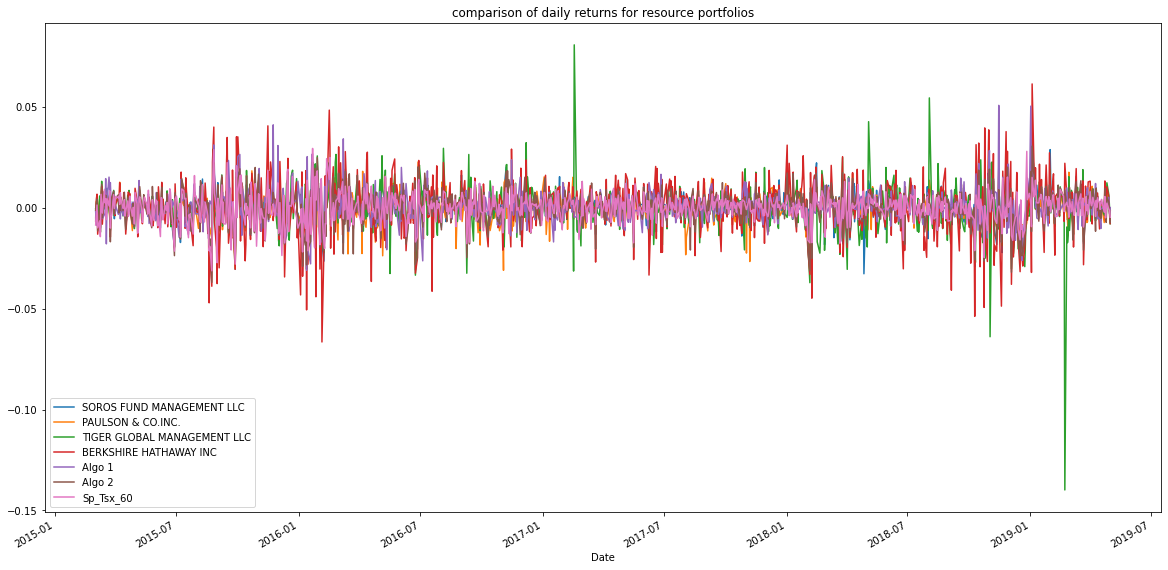

In [12]:
# Combining Resource portfolios and analysis
resource_portfolio_returns.plot(title = 'comparison of daily returns for resource portfolios',figsize = (20,10))

average_returns = resource_portfolio_returns[['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','Sp_Tsx_60']].mean()
cumulative_returns_of_each = (1 + resource_portfolio_returns).cumprod() - 1  # Calculating cumulative returns for resource portfolio

sp_standard_deviation = sp_tsx_returns.std() # standard deviation of SP_TSX_60 as a base

standard_deviation = resource_portfolio_returns.std() # daily standard deviation of resource portfolios

annualised_standard = standard_deviation * np.sqrt(252) # annualised standard deviation of resource portfolios


<AxesSubplot:title={'center':'Standard deviation of resource portfolios'}>

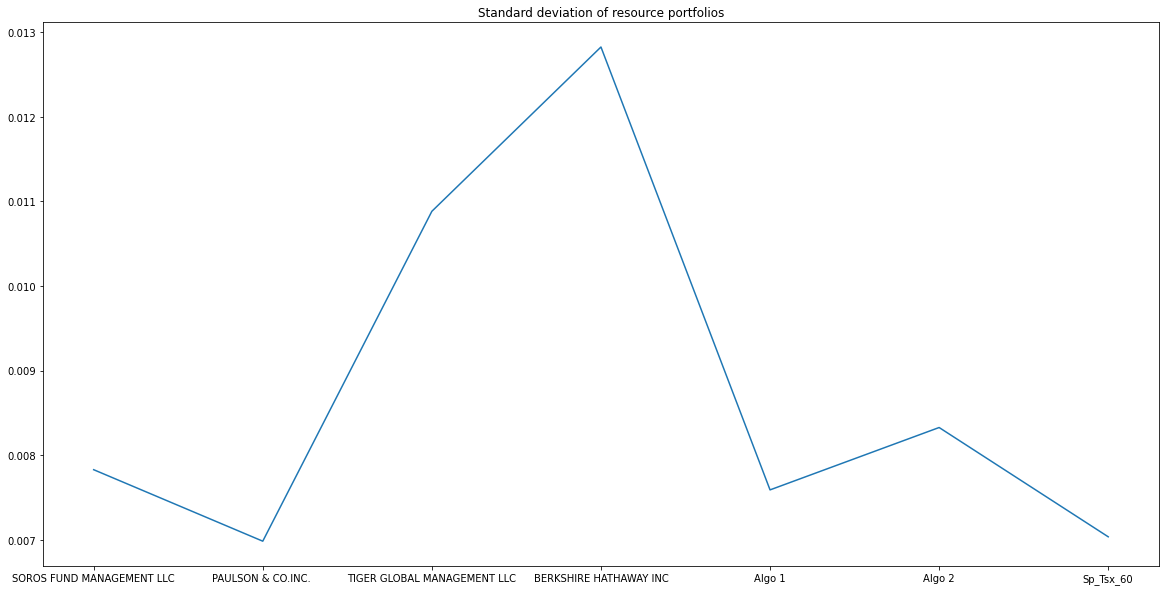

In [13]:
standard_deviation.plot(title = 'Standard deviation of resource portfolios', figsize = (20,10))


In [14]:
# Calculating annualised standard for imported portfolio
imported_standard_deviation = imported_returns.std() # standard deviation of imported portfolio
imported_annualised_standard = imported_standard_deviation * np.sqrt(252) # annualised standard deviation of imported portfolio


<AxesSubplot:title={'center':'cumulative returns for resource portfolios as box'}>

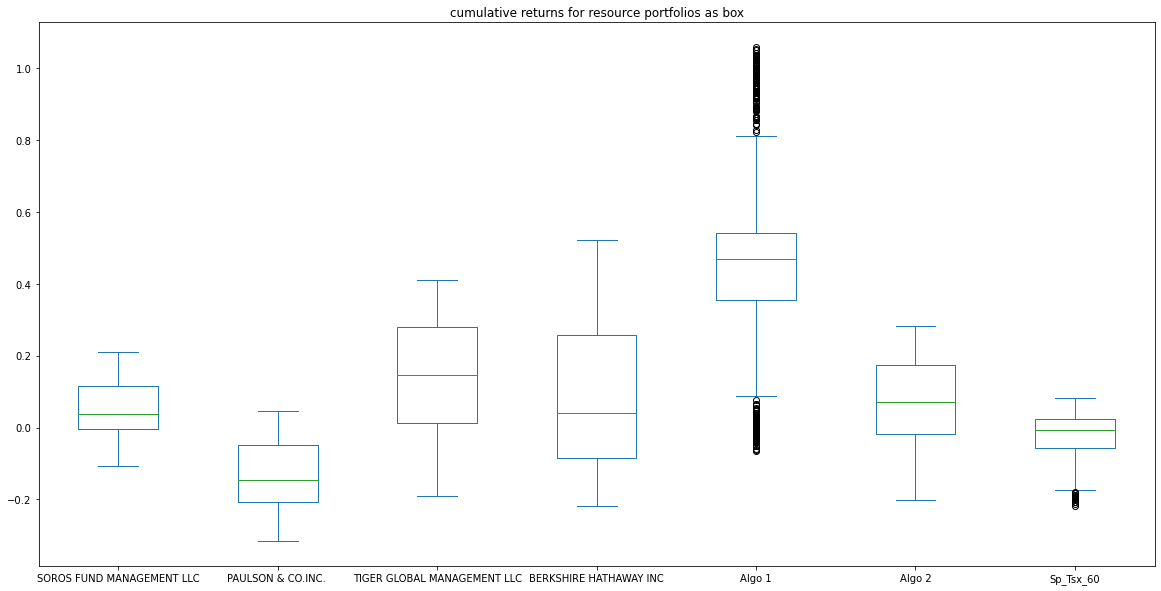

In [15]:
cumulative_returns_of_each.plot.box(title = 'cumulative returns for resource portfolios as box',figsize = (20,10)) 


<AxesSubplot:title={'center':'Cumulative returns for resource portfolios'}, xlabel='Date'>

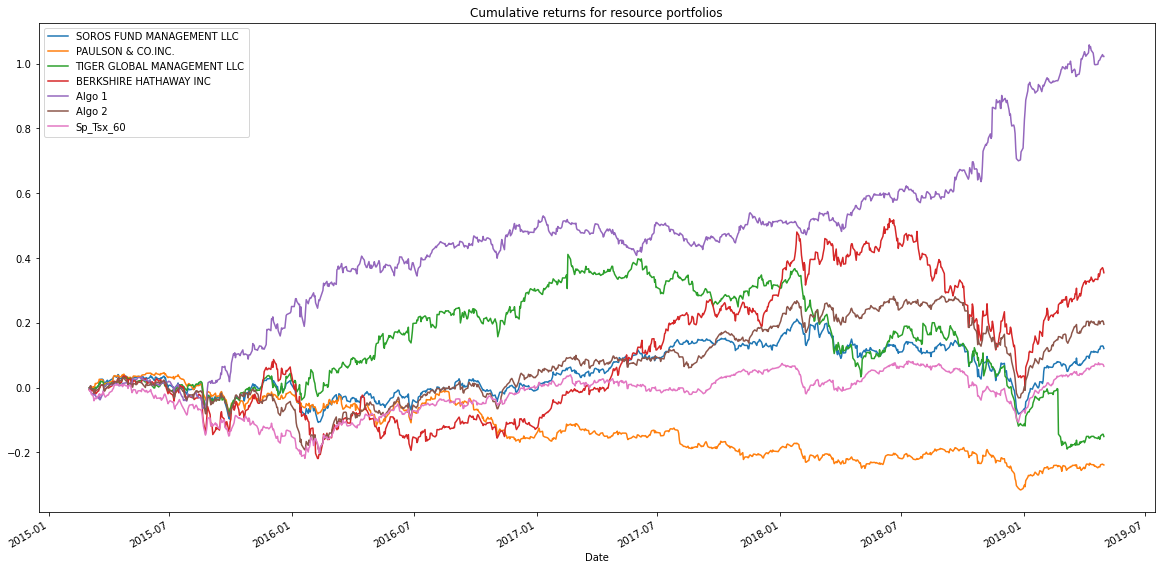

In [16]:
cumulative_returns_of_each.plot(title = 'Cumulative returns for resource portfolios',figsize=(20,10) )


<AxesSubplot:title={'center':'annualised standard deviation for resource portfolios'}>

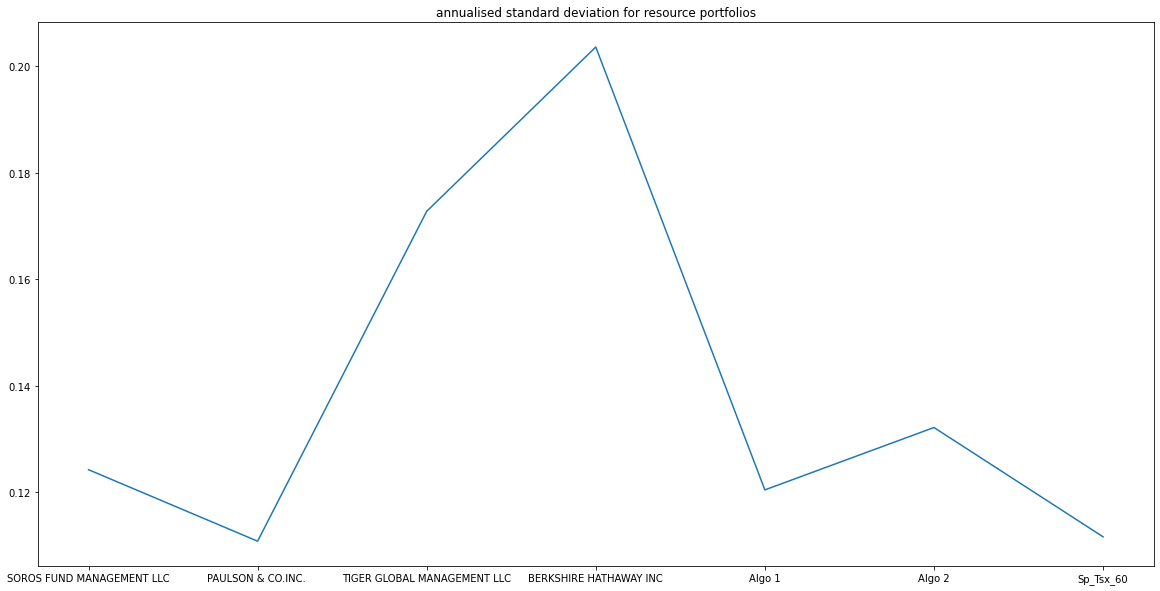

In [17]:
annualised_standard.plot(title = 'annualised standard deviation for resource portfolios',figsize=(20,10) )

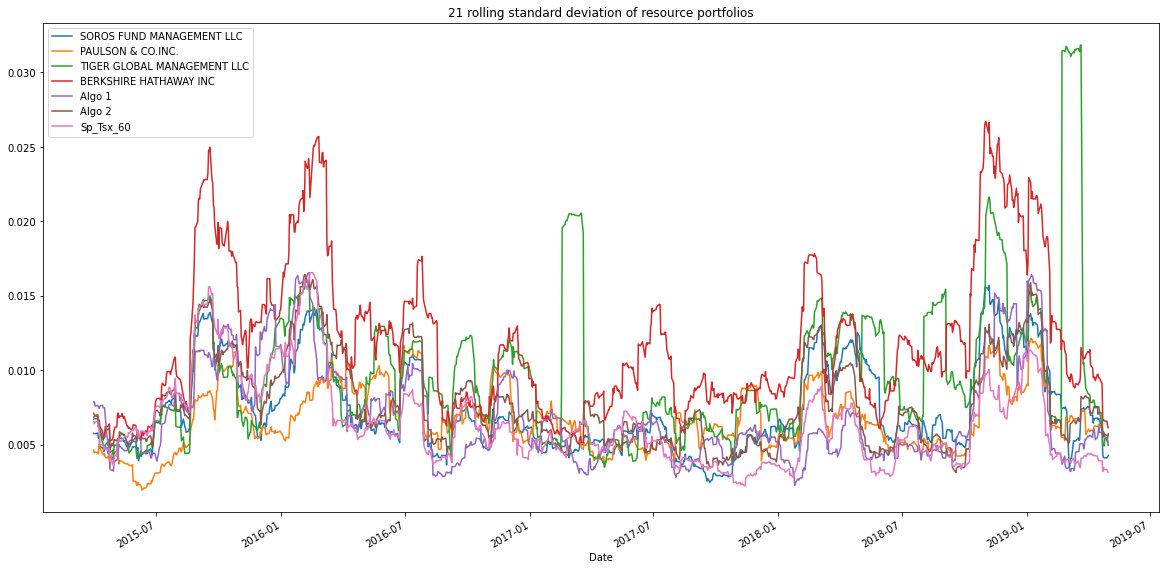

In [18]:
#21 day rolling plots
rolling_standard_deviation = resource_portfolio_returns.rolling(window=21).std().plot(title = '21 rolling standard deviation of resource portfolios',figsize=(20,10))

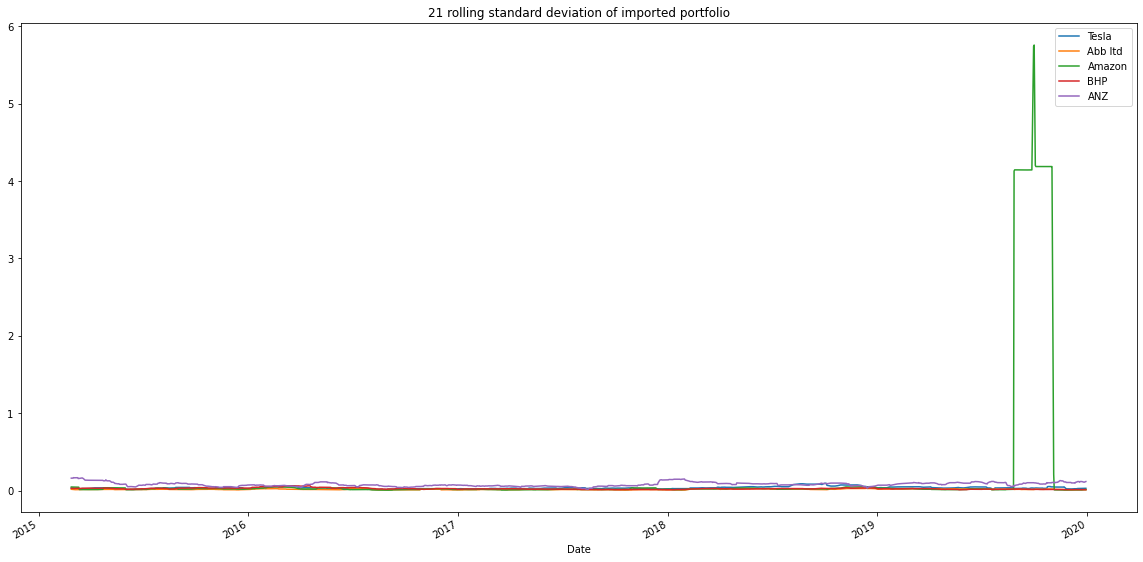

In [19]:

rolling_imported_standard_deviation = imported_returns.rolling(window=21).std().plot(title="21 rolling standard deviation of imported portfolio", figsize = (20,10))

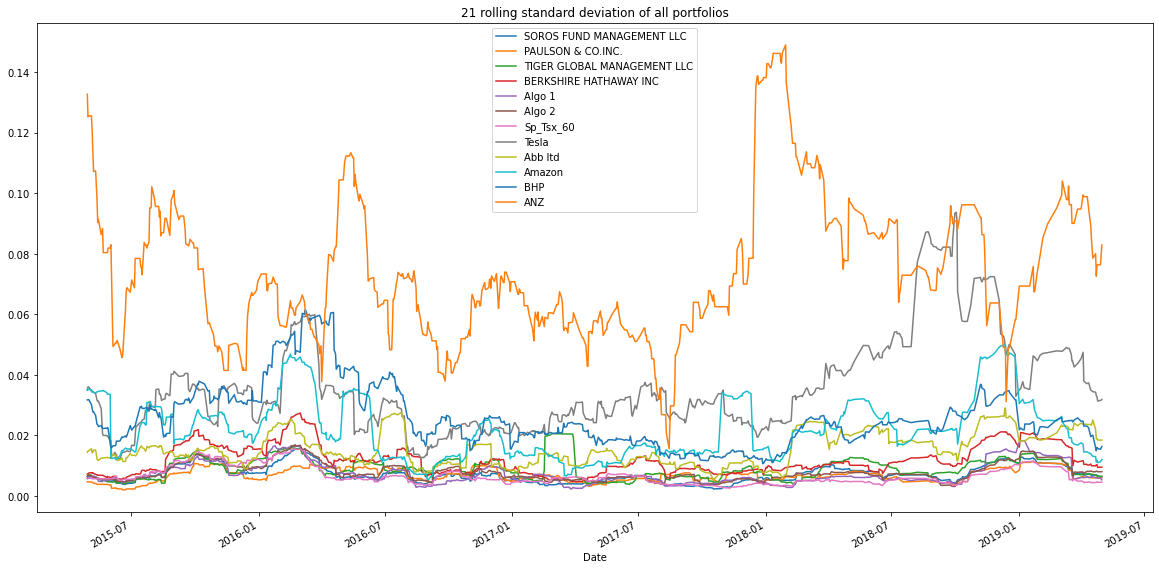

In [20]:
# Rolling Standard deviation for imported Portfolio amongst all portfolios
imported_rolling_standard_deviation = all_portfolio_returns.rolling(window=21).std().plot(title="21 rolling standard deviation of all portfolios", figsize = (20,10))

<AxesSubplot:title={'center':'correlation matrix for resource portfolios'}>

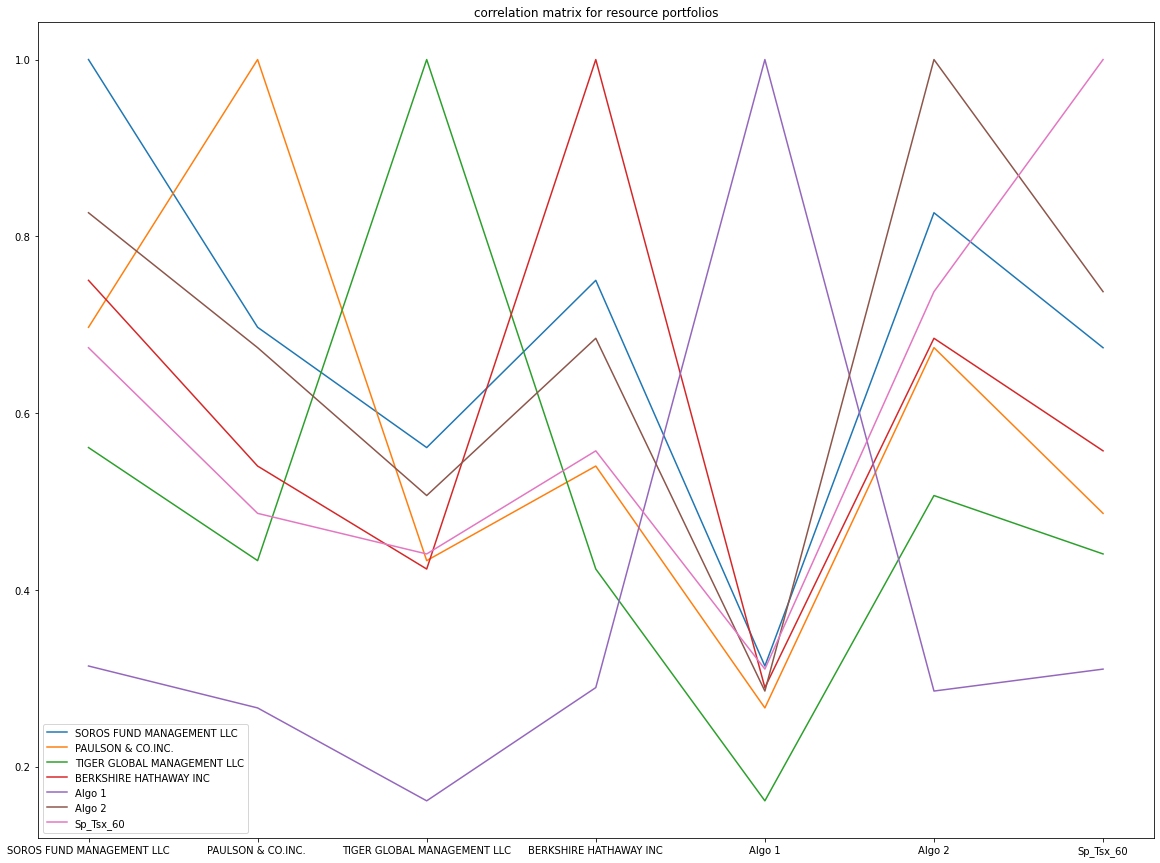

In [21]:
correlation_matrix = resource_portfolio_returns.corr()
correlation_matrix.plot(title ='correlation matrix for resource portfolios', figsize = (20,15))


<AxesSubplot:title={'center':'Correlation Matrix of all Portfolios'}>

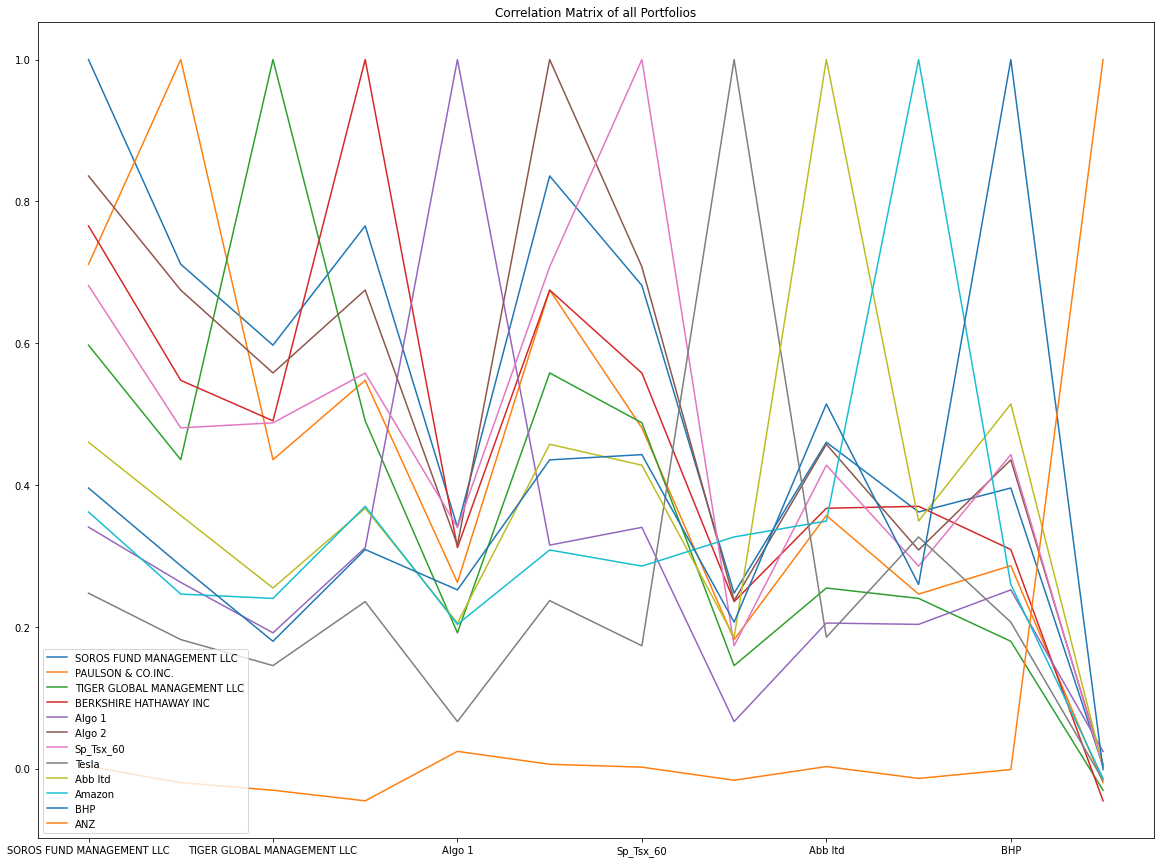

In [22]:
all_correlation_matrix = all_portfolio_returns.corr()
all_correlation_matrix.plot(title ='Correlation Matrix of all Portfolios', figsize = (20,15))

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

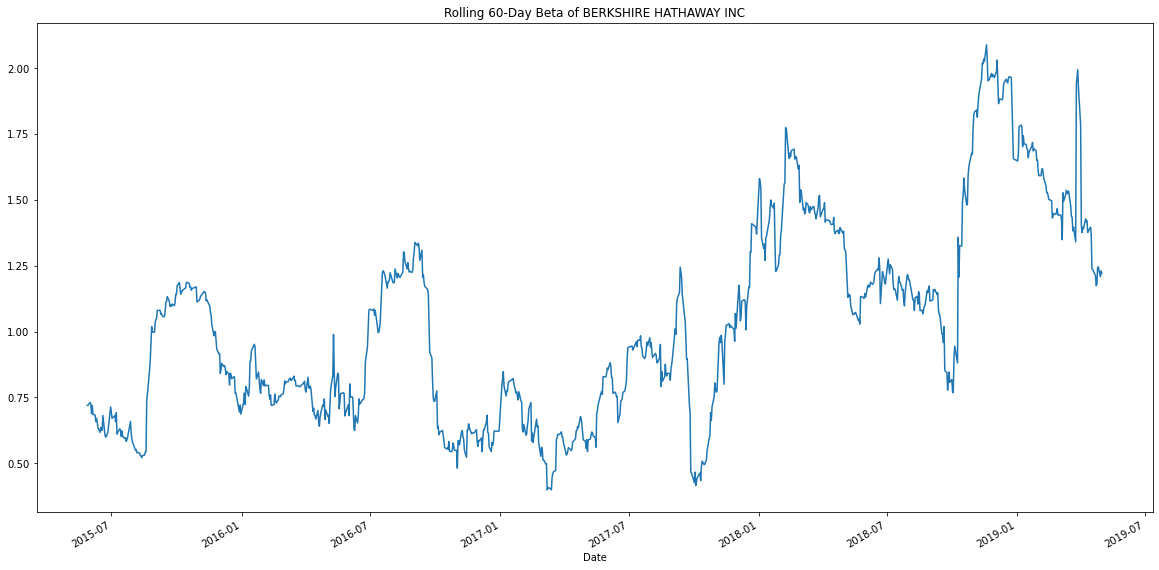

In [23]:
# Beta of a stock (Berkshire Hathaway Inc) against S&P Tsx 60
sp_Tsx_variance = resource_portfolio_returns['Sp_Tsx_60'].var()
covariance = resource_portfolio_returns['BERKSHIRE HATHAWAY INC'].cov(resource_portfolio_returns['Sp_Tsx_60'])
berkshire_beta = covariance/sp_Tsx_variance

rolling_covariance = resource_portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(resource_portfolio_returns['Sp_Tsx_60'])
rolling_variance = resource_portfolio_returns['Sp_Tsx_60'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')


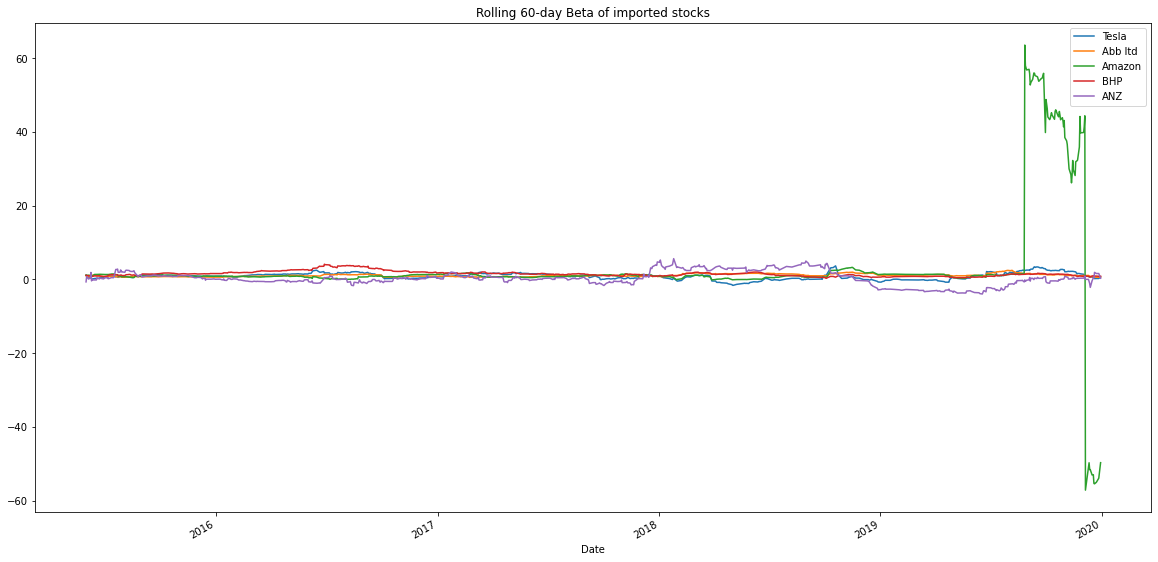

In [24]:
# Beta of imported portfolio against S&P 60 Tsx
imported_Beta = pd.concat([imported_returns,sp_tsx_returns],axis = 'columns',join = 'inner')
# individual imported covariances against S&P Tsx 60
tesla_covariance = imported_Beta['Tesla'].cov(imported_Beta['Sp_Tsx_60'])
abb_ltd_covariance  = imported_Beta['Abb ltd'].cov(imported_Beta['Sp_Tsx_60'])
amazon_covariance = imported_Beta['Amazon'].cov(imported_Beta['Sp_Tsx_60'])
bhp_covariance = imported_Beta['BHP'].cov(imported_Beta['Sp_Tsx_60'])
anz_covariance = imported_Beta['ANZ'].cov(imported_Beta['Sp_Tsx_60'])
# variance of S&P Tsx 60 for imported
imported_variance = imported_Beta['Sp_Tsx_60'].var()
# individual imported Betas
tesla_beta = tesla_covariance/imported_variance
abb_beta = abb_ltd_covariance/imported_variance
amazon_beta = amazon_covariance/imported_variance
bhp_beta = bhp_covariance/imported_variance
anz_beta = anz_covariance/imported_variance
# rolling 60-day covariance of imported
rolling_tesla_covariance = imported_Beta['Tesla'].rolling(window = 60).cov(imported_Beta['Sp_Tsx_60'])
rolling_abb_ltd_covariance = imported_Beta['Abb ltd'].rolling(window = 60).cov(imported_Beta['Sp_Tsx_60'])
rolling_amazon_covariance = imported_Beta['Amazon'].rolling(window = 60).cov(imported_Beta['Sp_Tsx_60'])
rolling_bhp_covariance = imported_Beta['BHP'].rolling(window = 60).cov(imported_Beta['Sp_Tsx_60'])
rolling_anz_covariance = imported_Beta['ANZ'].rolling(window = 60).cov(imported_Beta['Sp_Tsx_60']) 
# rolling 60-day variance for imported
rolling_imported_variance = imported_Beta['Sp_Tsx_60'].rolling(window=60).var()
# Rolling imported Betas
rolling_tesla_beta = rolling_tesla_covariance/rolling_imported_variance
rolling_abb_beta = rolling_abb_ltd_covariance/rolling_imported_variance
rolling_amazon_beta = rolling_amazon_covariance/rolling_imported_variance
rolling_bhp_beta = rolling_bhp_covariance/rolling_imported_variance
rolling_anz_beta = rolling_anz_covariance/rolling_imported_variance
# Plot rolling 60-day Beta for imports
ax = rolling_tesla_beta.plot(figsize = (20,10), title = 'Rolling 60-day Beta of imported stocks')
rolling_abb_beta.plot(ax=ax)
rolling_amazon_beta.plot(ax=ax)
rolling_bhp_beta.plot(ax=ax)
rolling_anz_beta.plot(ax=ax)
#Legend for rolling Beta plot
ax.legend(['Tesla','Abb ltd','Amazon','BHP','ANZ'])


<AxesSubplot:title={'center':'Exponentially weighted Moving Average for resource portfolios'}, xlabel='Date'>

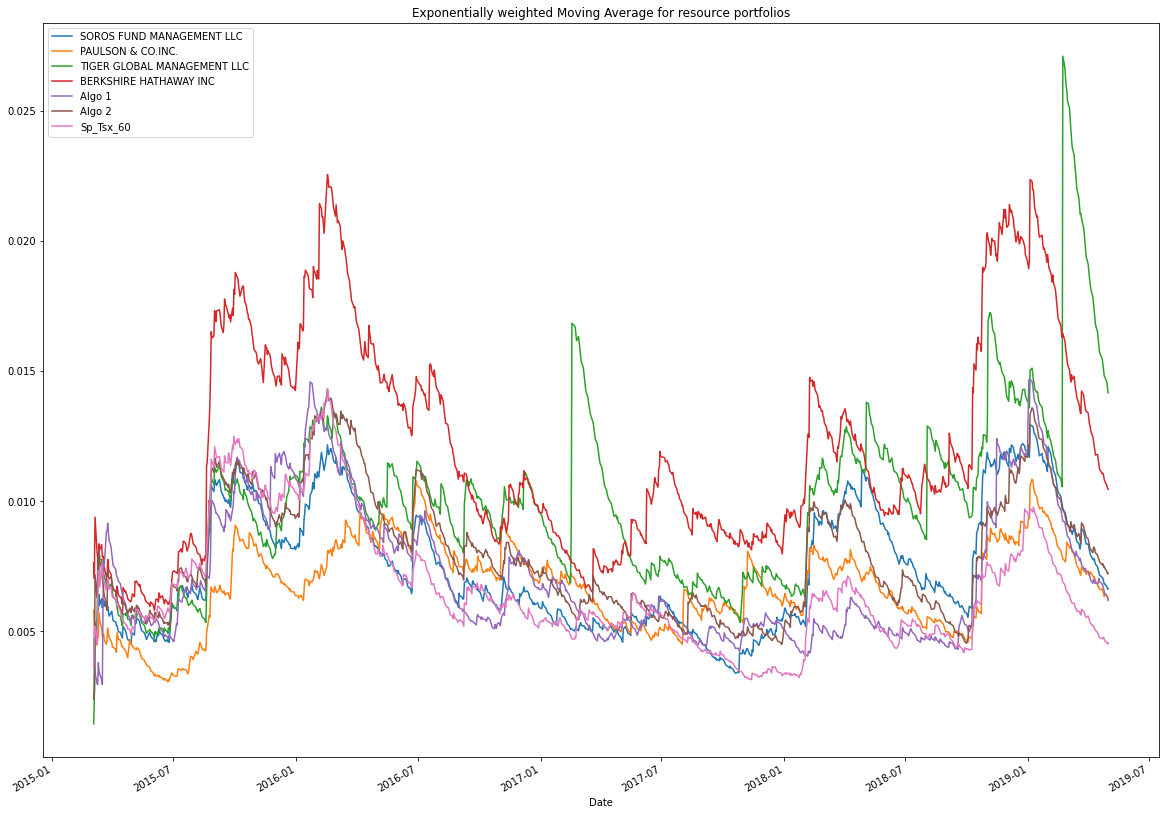

In [25]:
# Exponentially weighted plots for resource portfolios
Exponentially_Weighted_Moving_21 = resource_portfolio_returns.ewm(halflife=21).std() 
Exponentially_Weighted_Moving_21.plot(title ='Exponentially weighted Moving Average for resource portfolios', figsize = (20,15)) 


<AxesSubplot:title={'center':'All Exponentially weighted Moving Average'}, xlabel='Date'>

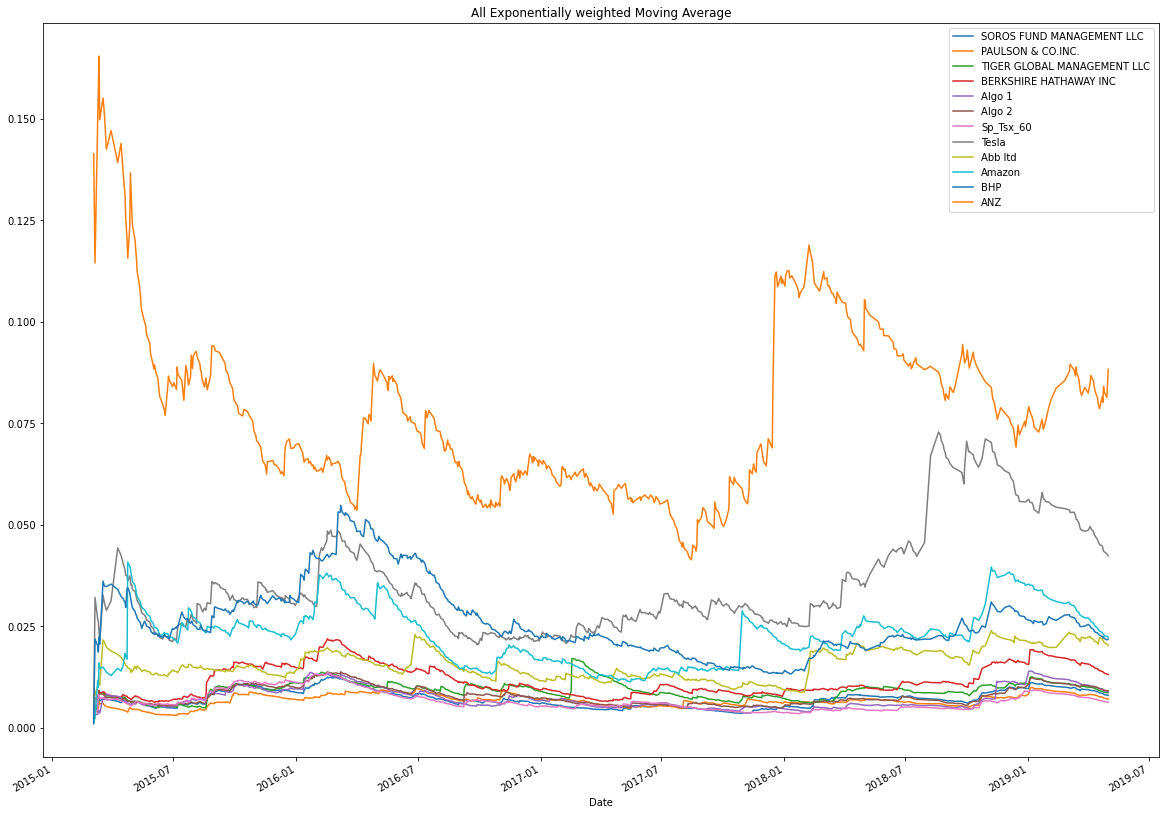

In [26]:
# Exponentially weighted plots for imported portfolio
All_Exponentially_Weighted_Moving_21 = all_portfolio_returns.ewm(halflife=21).std()
All_Exponentially_Weighted_Moving_21.plot(title ='All Exponentially weighted Moving Average', figsize = (20,15))

<AxesSubplot:title={'center':'Resource Portfolio Sharpe Ratios'}>

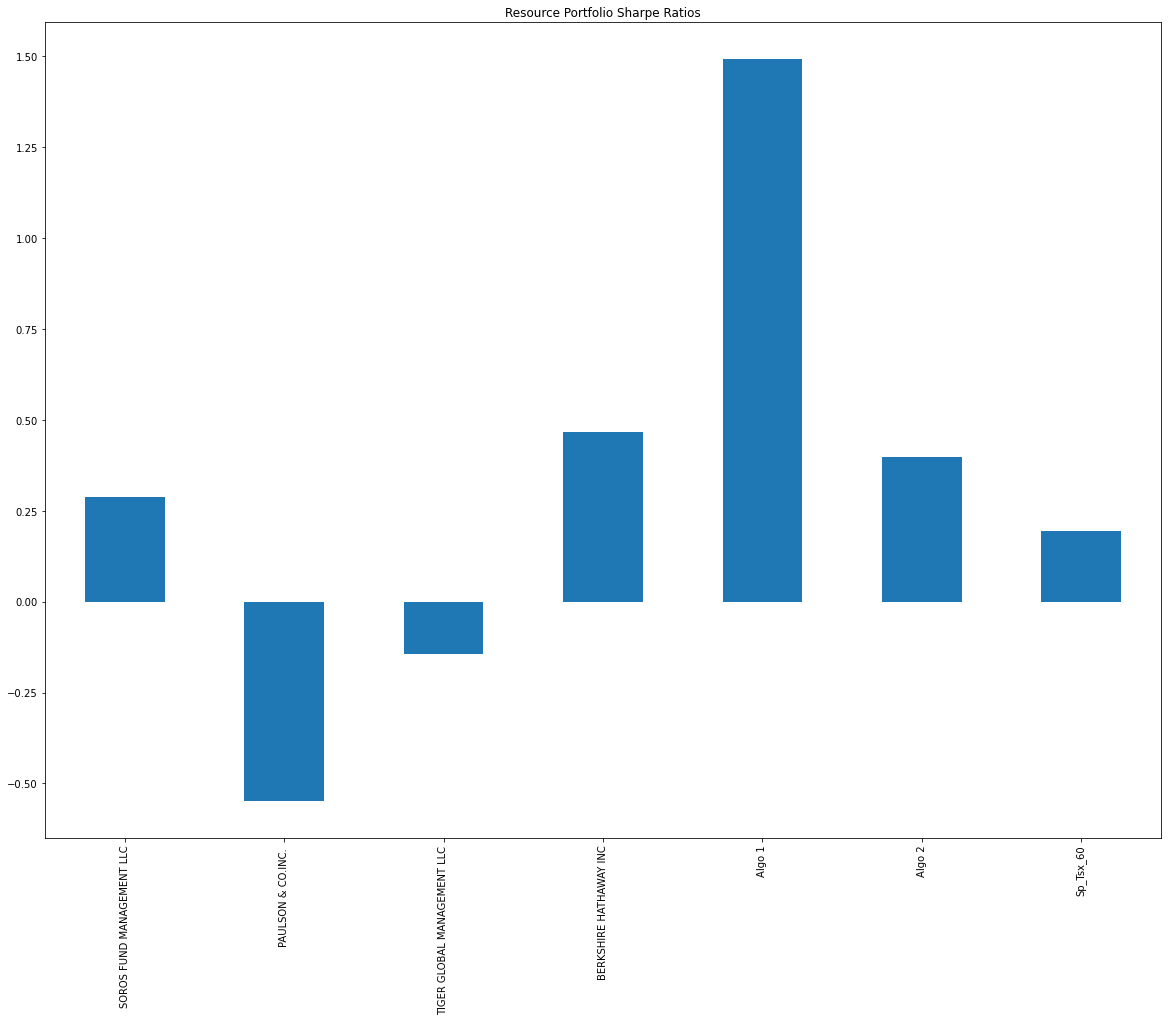

In [27]:
# Calculate Sharpe Ratios
resource_sharpe_ratios = (resource_portfolio_returns.mean() * 252) / (resource_portfolio_returns.std() * np.sqrt(252))
resource_sharpe_ratios.plot(kind = "bar", title = "Resource Portfolio Sharpe Ratios",figsize = (20,15))


<AxesSubplot:title={'center':'Imported Portfolio Sharpe Ratios'}>

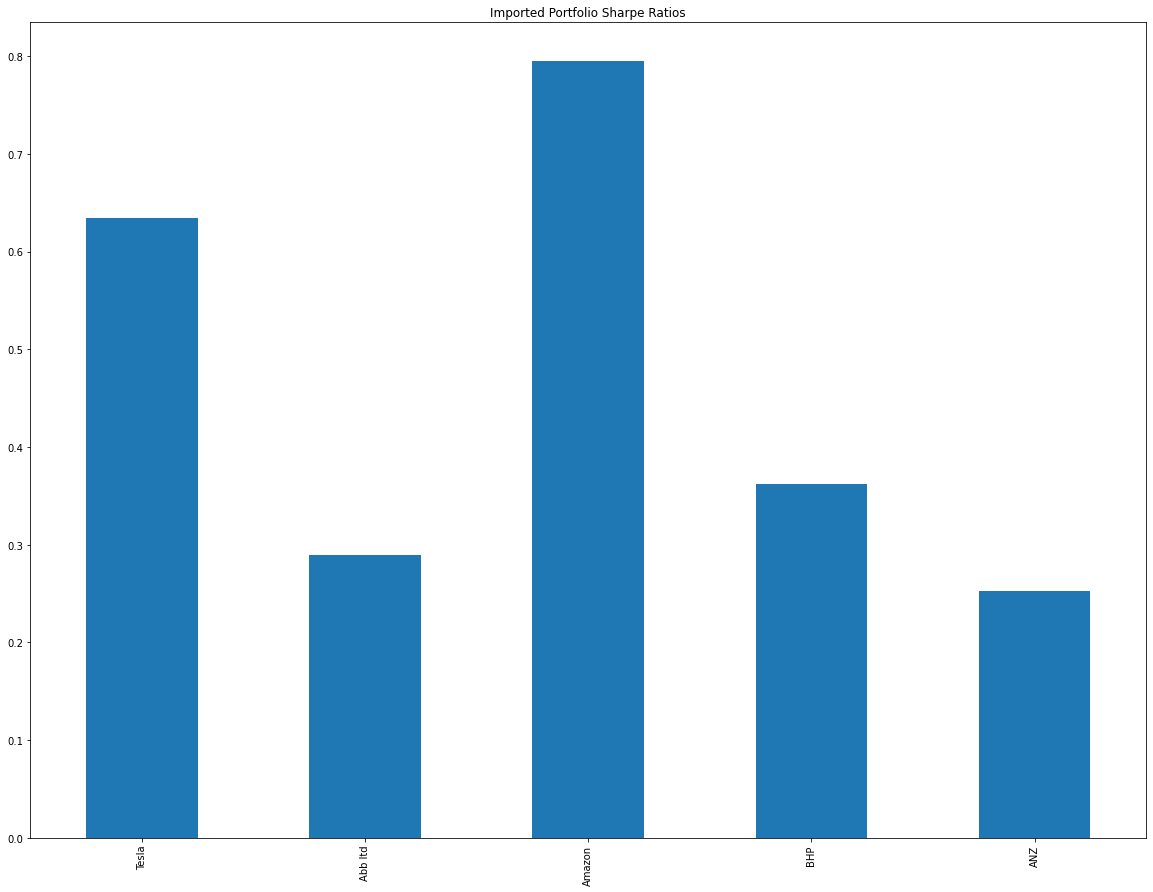

In [28]:
imported_sharpe_ratios = (imported_returns.mean() * 252) / (imported_returns.std() * np.sqrt(252))
imported_sharpe_ratios.plot(kind = "bar", title = "Imported Portfolio Sharpe Ratios",figsize = (20,15))

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

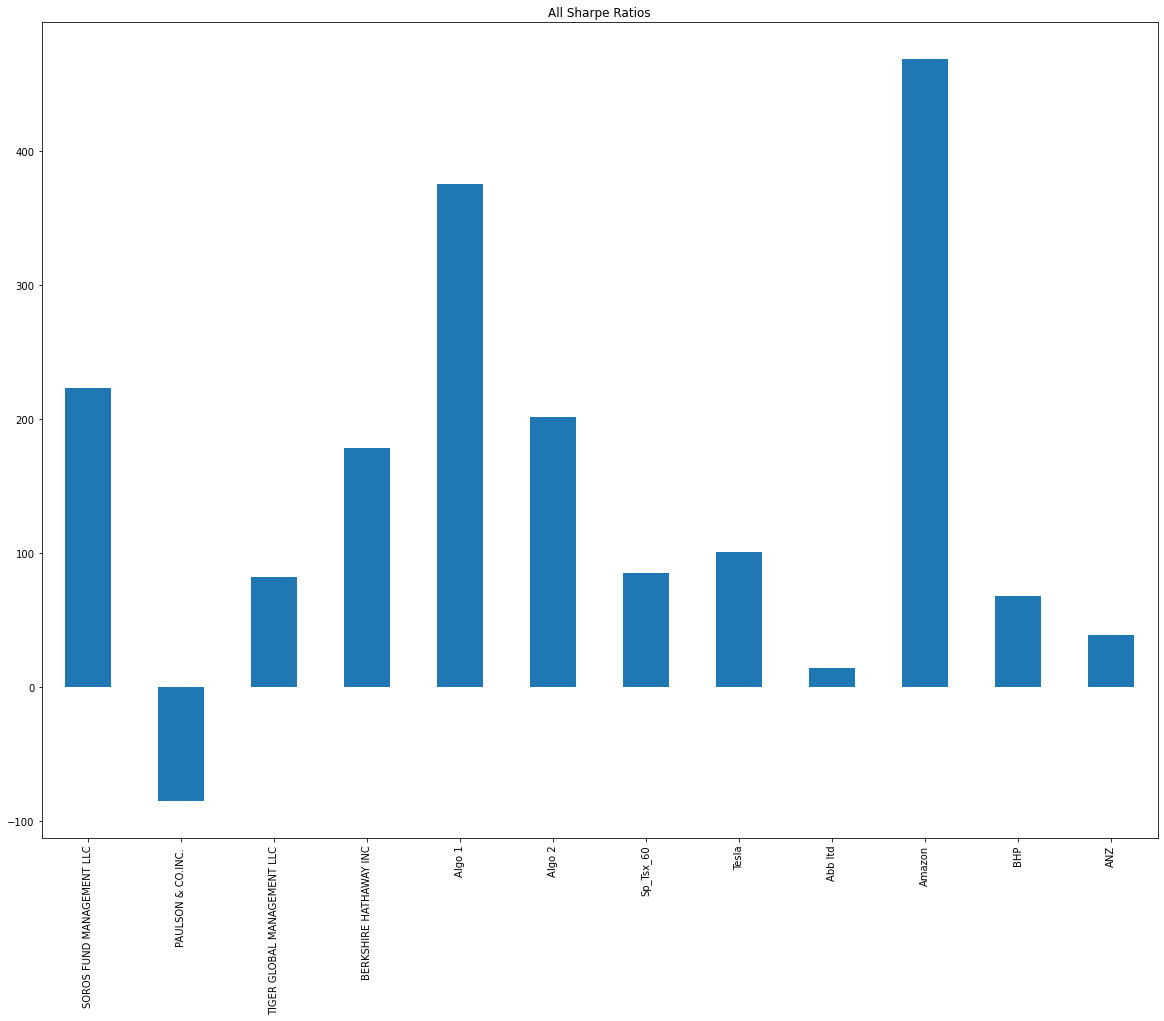

In [29]:
all_sharpe_ratios = (all_portfolio_returns.mean() * 252) / all_portfolio_returns.std() * np.sqrt(252)
all_sharpe_ratios.plot(kind = "bar", title = "All Sharpe Ratios",figsize = (20,15))


# The Algorith strategies outperform the market, the whales portfolios,  and the imported portfolio
# The imported portfolio barely beats the market and has a greater risk so it isnt a highly recommended portfolio.